**Анализ данных в задаче кредитного скоринга**

Review criteria

Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.

При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.

При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость.

**Задание**

1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

default - индикатор невозврата денежных средств


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('credit_card_default_analysis.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 25)

**ЗАДАНИЕ 1. Размер кредитного лимита (LIMIT_BAL)**

Посмотрим на распределение LIMIT_BAL по каждому из целевых признаков — вернул (default = 0) /не вернул (default = 1) : 

In [5]:
import matplotlib.pyplot as plt

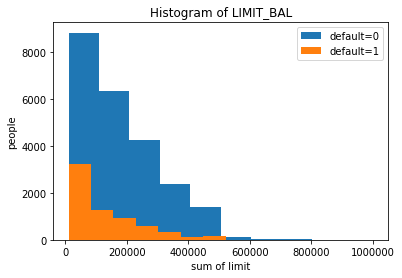

In [6]:
plt.title('Histogram of LIMIT_BAL')
plt.hist(data[data.default==0].LIMIT_BAL, label='default=0')
plt.hist(data[data.default==1].LIMIT_BAL, label='default=1')
plt.xlabel('sum of limit')
plt.ylabel('people')
plt.legend()


уже по графику видно, что медианы не равны. и у тех кто вернули кредит медиана выше. Распределения не нормальны.

In [7]:
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


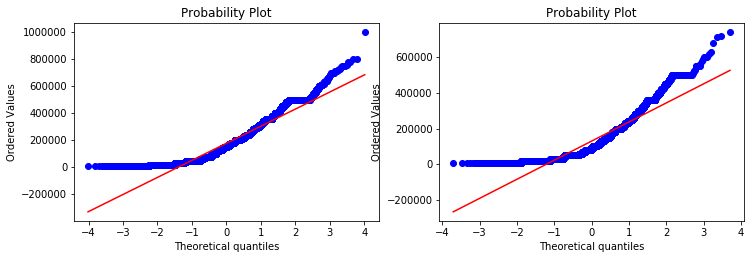

In [8]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data[data.default == 0].LIMIT_BAL, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data[data.default == 1].LIMIT_BAL, dist="norm", plot=pylab)
pylab.show()

проверьте гипотезы: **a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки**



In [9]:
nondefault = data[data.default == 0].LIMIT_BAL

In [10]:
default = data[data.default == 1].LIMIT_BAL

In [11]:
nondefault.median()

150000.0

In [12]:
default.median()

90000.0

Bootstrap

In [13]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data))) 
    # генерим 1000 выборок размера исходных данных из индексов от 0 до лен дата
    samples = data[indices] 
    # получаем эти индексы, дальше получаем выборки, применяя эти индексы набору данных и возвращаем выборки.
    return samples

In [14]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)]) 
    # 95% интевар. слева 2,5 и справа 97,5 квантили
    return boundaries
# Функция очень простая, передаём ей статистики, передаём ей α, а дальше берём наши статистики и упорядочиваем их
# по возрастанию, и говорим, что мы просто отрезаем слева и справа по кусочку равному α / 2 (слева) и (1 − α) / 2 (справа). 
#Давайте начнём с того, что получим независимые интервальные оценки медианы для клиентов двух типов. 

In [15]:
np.random.seed(0)

nondefault_median_scores = list(map(np.median, get_bootstrap_samples(np.array(nondefault), 1000)))
default_median_scores = list(map(np.median, get_bootstrap_samples(np.array(default), 1000)))

print("95% confidence interval for the nondefault median:",  stat_intervals(nondefault_median_scores, 0.05))
print("95% confidence interval for the default median :",  stat_intervals(default_median_scores, 0.05))

95% confidence interval for the nondefault median: [150000. 150000.]
95% confidence interval for the default median : [80000. 90000.]


интевралы не пересекаются - > медианны не равны. недефолтные кредиты имеют больший лимит. 

**о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?**

Перестановочный критерий

нулевая гипотеза состоит в том, что функции распределения для первой и второй выборки одинаковы. Они совпадают. Альтернатива следующая: функция распределения одной выборки получается сдвигом на некоторую дельту из функции распределения на другой выборке

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [16]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [17]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [18]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [19]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [20]:
print("p-value: %f" % permutation_test(nondefault, default, max_permutations = 1000))

p-value: 0.001000


Гипотиза от равности средних отвергается в пользу двусторонней (Неравности ). Результат значимый, видная зависмость дефолта от суммы лимита по кредиту (или наоборот - как посмотреть) . Скорее всего сумма лимита зависит от неких признаков, которые могут предсказать дефол/недефолт.

**Задание 2. Пол (SEX)**

Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. 

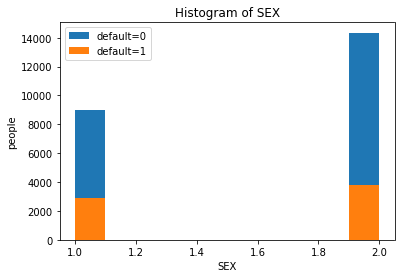

In [21]:
plt.title('Histogram of SEX')
plt.hist(data[data.default==0].SEX, label='default=0')
plt.hist(data[data.default==1].SEX, label='default=1')

plt.xlabel('SEX')
plt.ylabel('people')
plt.legend()

Женщины (справа) берут кредит чаще, и судя по рисунку, процент возврата больше.

проверим с помощью доверительного интервала и подходящего статистического критерия

сравним доли мужчин/женщин по целевому признаку (выборки не связаны)

In [22]:
men=data[data.SEX==1].default

In [23]:
women=data[data.SEX==2].default

In [24]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.) # находим z= 2F(z) - z -норм. распределелена 
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1. - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    return (left_boundary, right_boundary)

In [25]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(men, women))

confidence interval: [0.024207, 0.043612]


доля дефолтов среди мужчин больше - (интервал разницы больше нуля)

**в выборах men и women  присутствуют только 2 значения, cл-но они  взяты из распределения Бернулли. знаачит проверять на нормальность не нужно. Проверим гипотизу равенства долей дефолта среди женщин и мужчин (H0) альтернативой  - не равны (H1) с помошью критерия для долей Z**

In [26]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [27]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)
    

In [28]:
proportions_diff_z_test(proportions_diff_z_stat_ind(men, women))

4.472866521609831e-12

In [29]:
proportions_diff_z_test(proportions_diff_z_stat_ind(men, women), 'less')

0.9999999999977636

Нулевая гипотиа отвергается в пользу H1 ( доли не равны) на уровне значимоти 0.05. Более того гипотиза не отвершгатеся против одностороненней , что доля дефолтов среди мужчие меньше.  
Как итог женщины более ответвенны в гашении кредитов.

**Задание 3. Образование (EDUCATION)**

Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

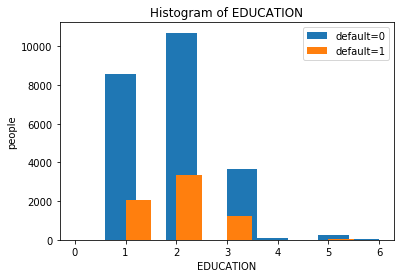

In [30]:
plt.title('Histogram of EDUCATION')
plt.hist(data[data.default==0].EDUCATION, label='default=0')
plt.hist(data[data.default==1].EDUCATION, label='default=1')
plt.xlabel('EDUCATION')
plt.ylabel('people')
plt.legend()

тружно по графику сравнить доли. вроде все одинаково) 

Требуется определить имеются ли статистически значимые различия между частотой лиц с раным образованием среди вернувших и не вернувших кредит? Ответить на этот вопрос можно, рассчитав критерий хи-квадрат Пирсона и сравнив получившееся значение с критическим.

Для определения меры взаимосвязи воспользуемся коэф Краммера для нескольких кат признаков. Он равен корню из специальным образом нормированного значения статистики хи-квадрат:

построим таблицу сопряженности в 2 строки и 7 столбцов. 

In [31]:
default_ed=list(sum(data[data.default==1].EDUCATION==i) for i in range (7))

In [32]:
nondefault_ed=list(sum(data[data.default==0].EDUCATION==i) for i in range (7))

In [33]:
sum_ed=[(default_ed[i] + nondefault_ed[i]) for i in range(7) ]
   

In [34]:
data[data.default==0].shape[0]

23364

In [35]:
data[data.default==1].shape[0]

6636

In [36]:
for i in range(7):
    print('Education %d: %d / %d | %d' % (i, default_ed[i], nondefault_ed[i], sum_ed[i]))
print('sum: ',  '6636 /','23364  |', '30000')

Education 0: 0 / 14 | 14
Education 1: 2036 / 8549 | 10585
Education 2: 3330 / 10700 | 14030
Education 3: 1237 / 3680 | 4917
Education 4: 7 / 116 | 123
Education 5: 18 / 262 | 280
Education 6: 8 / 43 | 51
sum:  6636 / 23364  | 30000


не будем рассчитывать ожидаемое количество наблюдений для каждой из ячеек таблицы сопряженности (**при условии справедливости нулевой гипотезы об отсутствии взаимосвязи**) путем перемножения сумм рядов и столбцов с последующим делением полученного произведения на общее число наблюдений - воспользуемся сразу scipy.stats.chi2_contingency

In [216]:
df=pd.DataFrame({'Education': ['доктор', 'магистр', 'бакалавр' ,'выпускник школы', 'ачальное образование', 'прочее','нет данных'],
                   'default': default_ed,
                    'nondefault': nondefault_ed,
                   })

In [217]:
df

,Education,default,nondefault
0,доктор,0,14
1,магистр,2036,8549
2,бакалавр,3330,10700
3,выпускник школы,1237,3680
4,ачальное образование,7,116
5,прочее,18,262
6,нет данных,8,43


In [218]:
df1=df.copy()

In [219]:
df['Total']=df.default+df.nondefault

In [220]:
df.loc[7]= df.sum() 

In [221]:
df.Education[7]='Total'

In [244]:
stats.chi2_contingency(df1.drop('Education',axis=1))

(163.21655786997073,
 1.2332626245415605e-32,
 6,
 array([[3.0968000e+00, 1.0903200e+01],
        [2.3414020e+03, 8.2435980e+03],
        [3.1034360e+03, 1.0926564e+04],
        [1.0876404e+03, 3.8293596e+03],
        [2.7207600e+01, 9.5792400e+01],
        [6.1936000e+01, 2.1806400e+02],
        [1.1281200e+01, 3.9718800e+01]]))

In [224]:
df

,Education,default,nondefault,Total
0,доктор,0,14,14
1,магистр,2036,8549,10585
2,бакалавр,3330,10700,14030
3,выпускник школы,1237,3680,4917
4,ачальное образование,7,116,123
5,прочее,18,262,280
6,нет данных,8,43,51
7,Total,6636,23364,30000


Гипотиза об отсутсвии корреляции между дефолтом и образованием (равенство к. Крамера нулю) уверено отвергается( . Связь есть 

достигаемый уровень значимости 1.2332626245415605e-32 при предельном 0.05

In [230]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [245]:
cramers_stat(df1.drop('Education',axis=1).values)

0.07376009713252163

**K Крамера показывает уровелнь корреляци 0,07, что говорит о слабой связи**

Проверим при каком оборазоввании возврат более вероятен

In [225]:
df['def_total']=df.default/df.Total

In [226]:
df['non_total']=df.nondefault/df.Total

In [228]:
df.sort_values('def_total')

,Education,default,nondefault,Total,def_total,non_total
0,доктор,0,14,14,0.000000,1.000000
4,ачальное образование,7,116,123,0.056911,0.943089
5,прочее,18,262,280,0.064286,0.935714
6,нет данных,8,43,51,0.156863,0.843137
1,магистр,2036,8549,10585,0.192348,0.807652
7,Total,6636,23364,30000,0.221200,0.778800
2,бакалавр,3330,10700,14030,0.237349,0.762651
3,выпускник школы,1237,3680,4917,0.251576,0.748424


**Выпускники школы имееют худшие показатели по возватам**

**Задание 4. Семейное положение (MARRIAGE)**

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

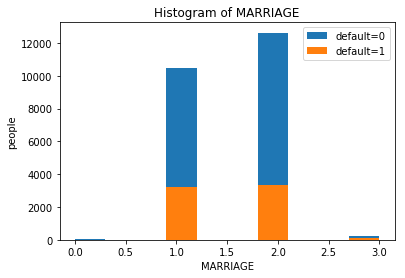

In [146]:
plt.title('Histogram of MARRIAGE')
plt.hist(data[data.default==0].MARRIAGE, label='default=0')
plt.hist(data[data.default==1].MARRIAGE, label='default=1')
plt.xlabel('MARRIAGE')
plt.ylabel('people')
plt.legend()

Сразу видно , что женатые возвращают кредит хуже. По другим признакам выборка слишко мала, чтобы сделать выводы\
далее так же посчитаем Крамера и chi2_contingency как и в предыдущем примере

In [265]:
default_m=list(sum(data[data.default==1].MARRIAGE==i) for i in range (4))
nondefault_m=list(sum(data[data.default==0].MARRIAGE==i) for i in range (4))

In [267]:
marr=pd.DataFrame({'MARRIAGE': ['отказываюсь отвечать', 'замужем/женат', 'холост' ,'нет данных'],
                   'default': default_m,
                    'nondefault': nondefault_m,
                   })

In [268]:
marr

,MARRIAGE,default,nondefault
0,отказываюсь отвечать,5,49
1,замужем/женат,3206,10453
2,холост,3341,12623
3,нет данных,84,239


In [274]:
stats.chi2_contingency(marr.drop('MARRIAGE',axis=1))

(35.66239583433609,
 8.825862457577375e-08,
 3,
 array([[1.19448000e+01, 4.20552000e+01],
        [3.02137080e+03, 1.06376292e+04],
        [3.53123680e+03, 1.24327632e+04],
        [7.14476000e+01, 2.51552400e+02]]))

Гипотиза об отсутвии связи между признаками уверно отвергается 

In [276]:
cramers_stat(marr.drop('MARRIAGE',axis=1).values)

0.034478203662766466

**К Крамера опять близок к нулю, что говорит о слабой связи**

**Задание 5. Возраст (AGE)**

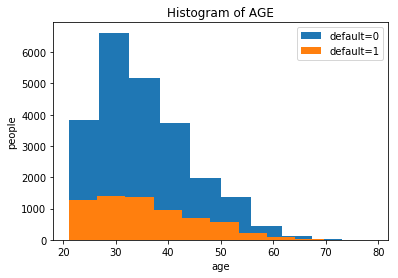

In [280]:
plt.title('Histogram of AGE')
plt.hist(data[data.default==0].AGE, label='default=0')
plt.hist(data[data.default==1].AGE, label='default=1')
plt.xlabel('age')
plt.ylabel('people')
plt.legend()

видно, что среди 30- летних доля возвратов выше остальных. проверим дальше

 проверьте следующие гипотезы:
 
a) о равенстве медианных значений возрастов людей 

In [282]:
nondefault_age = data[data.default == 0].AGE

In [283]:
default_age = data[data.default == 1].AGE

In [284]:
nondefault_age.median()

34.0

In [285]:
default_age.median()

34.0

Проверим интевралы с пом. бутстрепа

In [286]:
nondefault_age_median_scores = list(map(np.median, get_bootstrap_samples(np.array(nondefault_age), 1000)))
default_age_median_scores = list(map(np.median, get_bootstrap_samples(np.array(default_age), 1000)))

print("95% confidence interval for the nondefault median:",  stat_intervals(nondefault_age_median_scores, 0.05))
print("95% confidence interval for the default median :",  stat_intervals(default_age_median_scores, 0.05))

95% confidence interval for the nondefault median: [34. 34.]
95% confidence interval for the default median : [34. 35.]


интервалы пересекаются. пока не понятно. узнаем интервал разности медиан

In [288]:
dif=list(map(lambda x: x[1] - x[0], zip(nondefault_age_median_scores, default_age_median_scores)))

In [290]:
stat_intervals(dif,0.05)

array([0., 1.])

Интервал содержит ноль. Пока можем предполодить равенство медиан. Проверим далее распределения

нулевая гипотеза состоит в том, что функции распределения для первой и второй выборки одинаковы. Они совпадают. Альтернатива следующая: функция распределения одной выборки получается сдвигом на некоторую дельту из функции распределения на другой выборке

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [291]:
print("p-value: %f" % permutation_test(nondefault_age, default_age, max_permutations = 1000))

p-value: 0.014000


Гипотиза отвергается в пользу альтернативы на уровне значимости 0.05.
Релзультат значимый. видна разница распределения в левой части (до 30 лет). медина не учитывает такие значения.